In [2]:
# get train files
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

train_files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    train_files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(train_files_names)
print('There are %d training files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 training files


In [3]:
# import files into dataframe
import numpy as np
import pandas as pd

track_data = []
for building in train_files_names:
    track_data.append([])
    for track_name in building:
        print(track_name)
        track_data[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track_data[-1][-1][0]))

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# count wifi stations in each track
unique_aps = []
unique_macs = []
for building in track_data:
    for track in building:
        wifi_data = track.iloc[track[0].values == 'WIFI']
        wifi_names = wifi_data[3].values.astype(str)
        wifi_macs = wifi_data[4].values
        unique_aps.append(list(np.unique(wifi_names)))
        unique_macs.append(list(np.unique(wifi_macs)))

In [5]:
# Common items between two lists
def custom_cor(list1, list2):
    count = 0
    for item1 in list1:
        if item1 in list2:
            count += 1
    return count / min(len(list1), len(list2))

aps_cor = np.zeros((n_files, n_files))
mac_cor = np.zeros((n_files, n_files))
for i in range(n_files):
    for j in range(n_files):
        aps_cor[i, j] = custom_cor(unique_aps[i], unique_aps[j])
        mac_cor[i, j] = custom_cor(unique_macs[i], unique_macs[j])

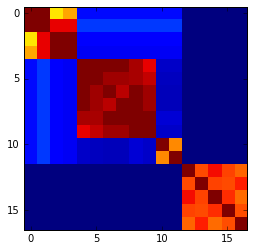

In [6]:
# plot ap names correlation
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(aps_cor, interpolation='nearest')

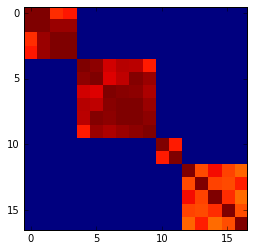

In [7]:
# plot ap macs correlation
plt.imshow(mac_cor, interpolation='nearest')

In [8]:
# Find time limits per POSI id
def posi_time_limits(posi_array):
    # create start and end index time array
    posi_array['ind_begin_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'].iloc[-1] = 99999

    for i in range(1, posi_array.shape[0]):
        cur_split = (float(posi_array['Time'].iloc[i]) + float(posi_array['Time'].iloc[i-1])) / 2
        posi_array['ind_begin_time'].iat[i] = cur_split       
        posi_array['ind_end_time'].iat[i-1] = cur_split       
    return posi_array

track_posi = []
for i in range(len(track_data)):
    track_posi.append([])
    for j in range(len(track_data[i])):
        track_posi[i].append(track_data[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track_data[i][j][0].values == 'POSI'])
        track_posi[i][j] = track_posi[i][j].dropna(axis=1)
        track_posi[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        track_posi[i][j] = posi_time_limits(track_posi[i][j])
print(train_files_names[i][j])
print(track_posi[i][j].head())

train/UJIUB/logfile_UJIUB_R3_S3.txt
        Time  index         Lat         Lon  FloorID  BuildingID  \
812    3.175    1.0  0.00000000  0.00000000      0.0         0.0   
2499   9.448    2.0  0.00000000  0.00000000      0.0         0.0   
5257  19.942    3.0  0.00000000  0.00000000      0.0         0.0   
7255  27.481    4.0  0.00000000  0.00000000      0.0         0.0   
9233  35.057    5.0  0.00000000  0.00000000      0.0         0.0   

      ind_begin_time  ind_end_time  
812           0.0000        6.3115  
2499          6.3115       14.6950  
5257         14.6950       23.7115  
7255         23.7115       31.2690  
9233         31.2690       36.0605  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements
for i in range(len(track_data)):
    for j in range(len(track_data[i])):
        print('data: ', i, j)
        track_data[i][j]['POSI_index'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_floor'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_building'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_lat'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_lon'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        for k in range(track_posi[i][j].shape[0]):
            ind_begin_time = track_posi[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = track_posi[i][j]['ind_end_time'].iloc[k]
    
            ind = track_posi[i][j]['index'].iloc[k]
            ind_floor = track_posi[i][j]['FloorID'].iloc[k]
            ind_building = track_posi[i][j]['BuildingID'].iloc[k]
            ind_lat = track_posi[i][j]['Lat'].iloc[k]
            ind_lon = track_posi[i][j]['Lon'].iloc[k]
            
            index_limits = np.logical_and(track_data[i][j][1].values >= ind_begin_time, 
                                          track_data[i][j][1].values < ind_end_time)
            
            track_data[i][j]['POSI_index'].iloc[index_limits] = ind
            track_data[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track_data[i][j]['POSI_building'].iloc[index_limits] = ind_building
            track_data[i][j]['POSI_lat'].iloc[index_limits] = ind_lat
            track_data[i][j]['POSI_lon'].iloc[index_limits] = ind_lon
        print(track_data[i][j].head())

      0      1         2         3          4          5        6       7  \
0  ACCE  0.094  4292.788  -1.38864    4.62560    8.40844  3.00000     NaN   
1  MAGN  0.095  4292.788  -5.64000  -39.72000  -19.56000  3.00000     NaN   
2  GYRO  0.097  4292.792  -0.16432   -0.20861   -0.19609  3.00000     NaN   
3  AHRS  0.098  4292.792   28.5264     9.6349 -161.85360  0.11909 -0.2296   
4  LIGH  0.098  4292.792   14561.0          3        NaN      NaN     NaN   

        8    9  10  POSI_index  POSI_floor  POSI_building     POSI_lat  \
0     NaN  NaN NaN         1.0         0.0           10.0  40.31347091   
1     NaN  NaN NaN         1.0         0.0           10.0  40.31347091   
2     NaN  NaN NaN         1.0         0.0           10.0  40.31347091   
3 -0.9504  3.0 NaN         1.0         0.0           10.0  40.31347091   
4     NaN  NaN NaN         1.0         0.0           10.0  40.31347091   

   POSI_lon  
0  -3.48315  
1  -3.48315  
2  -3.48315  
3  -3.48315  
4  -3.48315  
      0 

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
# create pressure data frames
pres_data = []
for building in track_data:
    pres_data.append([])
    for track in building:
        if track.iloc[track[0].values == 'PRES'].shape[0]:
            pres_data[-1].append(track.iloc[track[0].values == 'PRES'])
            pres_data[-1][-1] = pres_data[-1][-1].dropna(axis=1)
            pres_data[-1][-1] = pres_data[-1][-1].drop(0, axis=1)
            pres_data[-1][-1].columns.values[:4] = ['AppTime', 'SensorTime', 'pres', 'acc']
        else:
            pres_data[-1].append(0)

In [34]:
# plot pressure and floor over time
for i in range(len(pres_data)):
    for j in range(len(pres_data[i])):
        print('pressure data: ', i, j)
        if not type(pres_data[i][j]) == int:
            print(pres_data[i][j].head())

pressure data:  0 0
    AppTime  SensorTime      pres acc  POSI_index  POSI_floor  POSI_building  \
10    0.102    4292.816  957.4568   3         1.0         0.0           10.0   
21    0.112    4292.856  957.4045   3         1.0         0.0           10.0   
32    0.119    4292.896  957.3178   3         1.0         0.0           10.0   
43    0.146    4292.936  957.4744   3         1.0         0.0           10.0   
54    0.191    4292.976  957.4617   3         1.0         0.0           10.0   

       POSI_lat  POSI_lon  
10  40.31347091  -3.48315  
21  40.31347091  -3.48315  
32  40.31347091  -3.48315  
43  40.31347091  -3.48315  
54  40.31347091  -3.48315  
pressure data:  0 1
pressure data:  0 2
    AppTime    SensorTime      pres acc  POSI_index  POSI_floor  \
9     0.031  1.460625e+09  953.6912   3         1.0         0.0   
28    0.052  1.460625e+09  953.7043   3         1.0         0.0   
47    0.098  1.460625e+09  953.6653   3         1.0         0.0   
65    0.155  1.460625e+

In [14]:
# create wifi data frames
wifi_data = []
for building in track_data:
    wifi_data.append([])
    for track in building:
        wifi_data[-1].append(track.iloc[track[0].values == 'WIFI'])